# Import thư viện

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.preprocessing import RobustScaler, LabelEncoder

warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
train.shape

(59381, 128)

# Tiền xử lý dữ liệu

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,59381.0,39507.211515,22815.883089,2.0,19780.000000,39487.000000,59211.000000,79146.0
Product_Info_1,59381.0,1.026355,0.160191,1.0,1.000000,1.000000,1.000000,2.0
Product_Info_3,59381.0,24.415655,5.072885,1.0,26.000000,26.000000,26.000000,38.0
Product_Info_4,59381.0,0.328952,0.282562,0.0,0.076923,0.230769,0.487179,1.0
Product_Info_5,59381.0,2.006955,0.083107,2.0,2.000000,2.000000,2.000000,3.0
...,...,...,...,...,...,...,...,...
Medical_Keyword_45,59381.0,0.013691,0.116207,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_46,59381.0,0.008488,0.091737,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_47,59381.0,0.019905,0.139676,0.0,0.000000,0.000000,0.000000,1.0
Medical_Keyword_48,59381.0,0.054496,0.226995,0.0,0.000000,0.000000,0.000000,1.0


Xử lí null của tập train

In [6]:
train.isnull().sum()[train.isnull().sum() > 0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

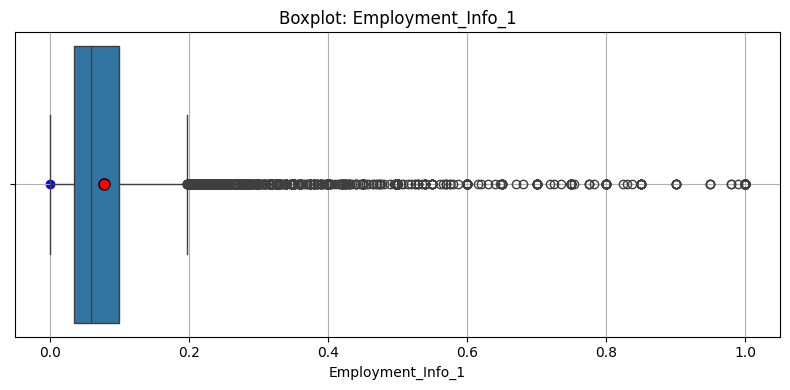

In [7]:
train_null_cols = 'Employment_Info_1'

# Tính mode của cột có giá trị null
mode = train[train_null_cols].mode()[0]

plt.figure(figsize=(8, 4))
sns.boxplot(x=train[train_null_cols], showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                       "markersize":"8"})
plt.scatter([0], [mode], color='blue', label=f'Mode: {mode}')
plt.title(f"Boxplot: {train_null_cols}")
plt.xlabel(train_null_cols)
plt.grid(True)
plt.tight_layout()
plt.show()

# Chấm đỏ là mean
# Đường đen là median
# Chấm xanh dương là mode

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='Medical_History_15', bins=20, kde=True)
plt.title('Histogram: Medical_History_15')
plt.show()

In [ ]:
train['Employment_Info_1'].fillna(train['Employment_Info_1'].median(), inplace=True)
train['Employment_Info_4'].fillna(train['Employment_Info_4'].median(), inplace=True)
train['Employment_Info_6'].fillna(train['Employment_Info_6'].mean(), inplace=True)
train['Insurance_History_5'].fillna(train['Insurance_History_5'].median(), inplace=True)
train['Family_Hist_2'].fillna(train['Family_Hist_2'].median(), inplace=True)
train['Family_Hist_3'].fillna(train['Family_Hist_3'].median(), inplace=True)
train['Family_Hist_4'].fillna(train['Family_Hist_4'].mean(), inplace=True)
train['Family_Hist_5'].fillna(train['Family_Hist_5'].median(), inplace=True)
train['Medical_History_1'].fillna(train['Medical_History_1'].median(), inplace=True)
train['Medical_History_15'].fillna(train['Medical_History_15'].median(), inplace=True)
train['Medical_History_24'].fillna(train['Medical_History_24'].median(), inplace=True)
train['Medical_History_32'].fillna(train['Medical_History_32'].median(), inplace=True)


# Chuẩn hóa

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

In [ ]:
scaler = RobustScaler()
for col in train.columns:
    train[col] = scaler.fit_transform(train[[col]])

In [ ]:
X_train = train.drop(columns=['Response'])
y_train = train['Response']